<a href="https://www.kaggle.com/code/salilapte/data-mining-comment-classifier?scriptVersionId=212051610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [12]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import re  # For regular expressions in text cleaning
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LogisticRegression  # For Logistic Regression model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
)  # For model evaluation metrics

974470
Missing Values:
 text         0
generated    0
dtype: int64

Class Distribution:
 generated
0.0    305797
1.0    181438
Name: count, dtype: int64

Text Length Statistics:
 count    487235.000000
mean       2269.586592
std         988.814028
min           1.000000
25%        1583.000000
50%        2102.000000
75%        2724.000000
max       18322.000000
Name: text_length, dtype: float64
                                                text  \
0  Cars. Cars have been around since they became ...   
1  Transportation is a large necessity in most co...   
2  "America's love affair with it's vehicles seem...   
3  How often do you ride in a car? Do you drive a...   
4  Cars are a wonderful thing. They are perhaps o...   

                                        cleaned_text  
0  cars cars have been around since they became f...  
1  transportation large necessity most countries ...  
2  americas love affair its vehicles seems be coo...  
3  how often do you ride car do you drive one 

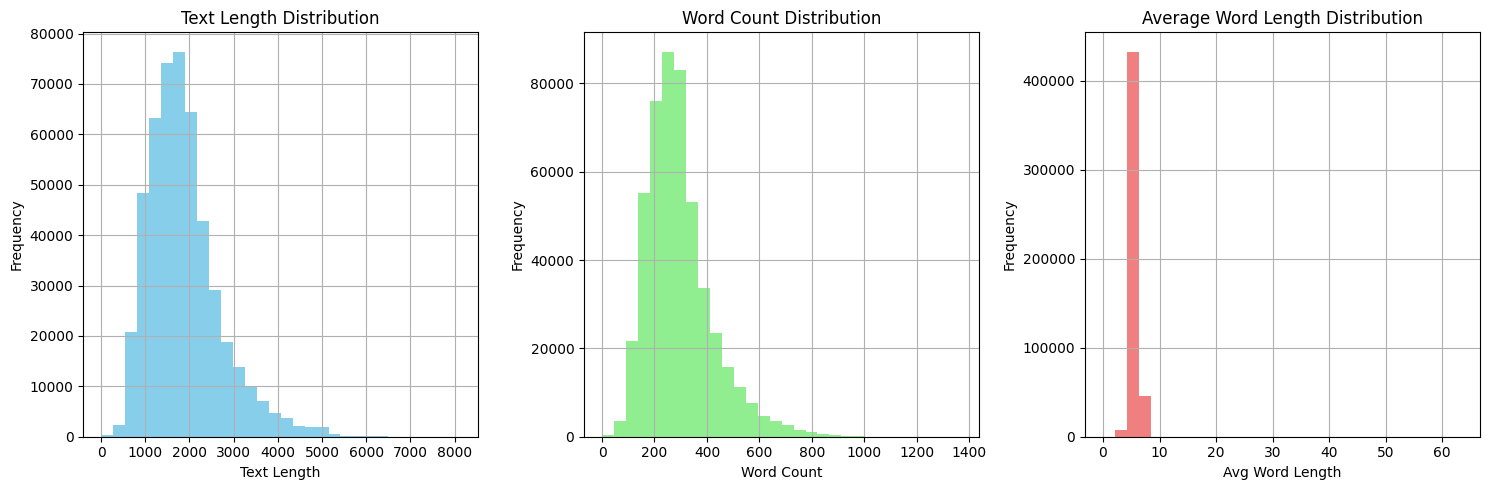


TF-IDF Features (Unigrams and Bigrams):
    able     about  accidents  according    action  activities  activity  \
0   0.0  0.000000        0.0   0.000000  0.000000         0.0  0.000000   
1   0.0  0.057603        0.0   0.000000  0.000000         0.0  0.000000   
2   0.0  0.015019        0.0   0.095195  0.033244         0.0  0.000000   
3   0.0  0.041003        0.0   0.043315  0.000000         0.0  0.044676   
4   0.0  0.000000        0.0   0.000000  0.000000         0.0  0.000000   

   actually  additionally  advantages  ...  years       you  you are  you can  \
0   0.00000      0.000000    0.000000  ...    0.0  0.035298      0.0      0.0   
1   0.00000      0.000000    0.000000  ...    0.0  0.027184      0.0      0.0   
2   0.00000      0.029097    0.059461  ...    0.0  0.042525      0.0      0.0   
3   0.03736      0.000000    0.081167  ...    0.0  0.174145      0.0      0.0   
4   0.00000      0.000000    0.052994  ...    0.0  0.050534      0.0      0.0   

   you have  you sho

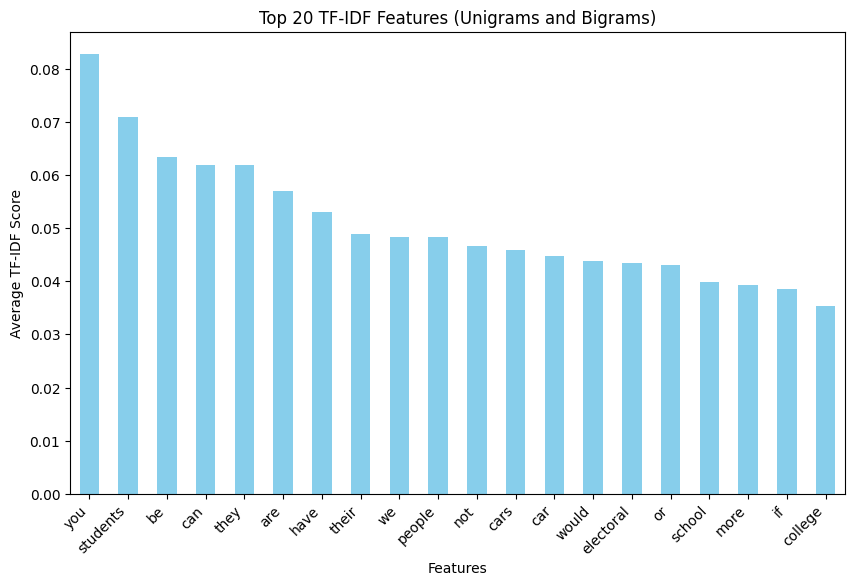

Logistic Regression Accuracy: 0.9943148583332478
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     61112
         1.0       1.00      0.99      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



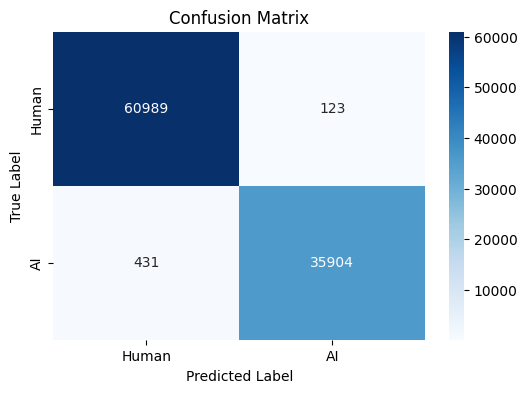

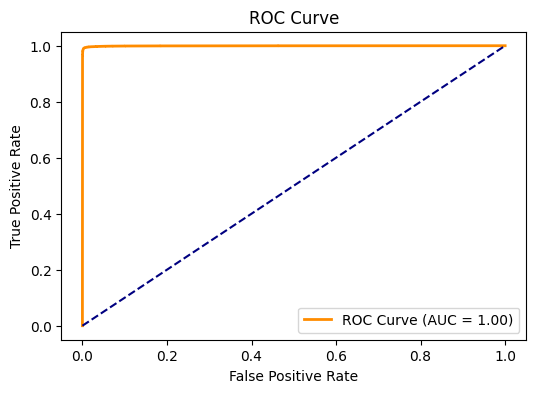

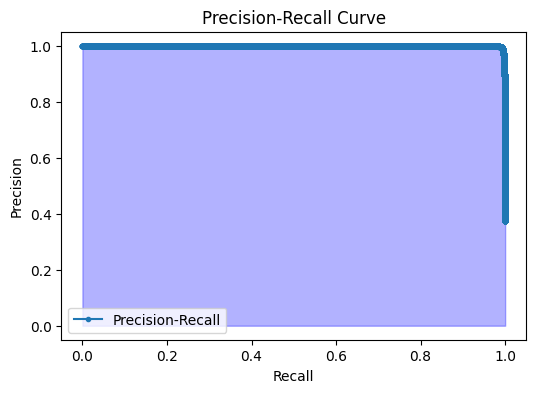

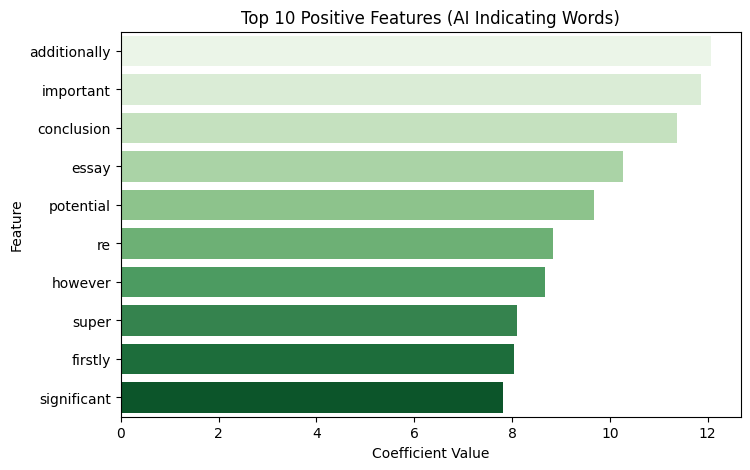

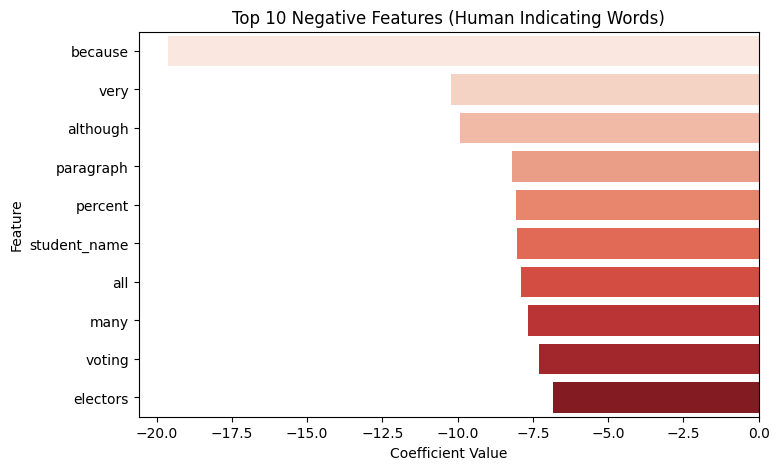

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


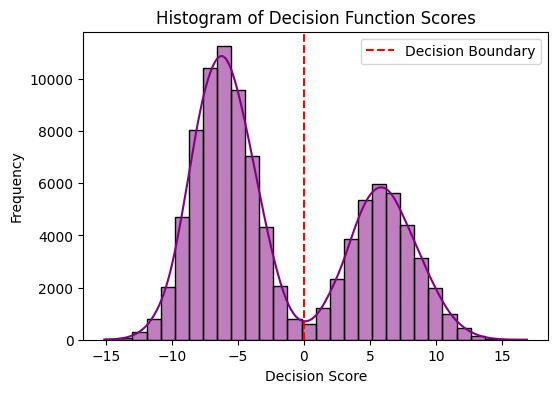

In [13]:
# Load the dataset
df = pd.read_csv('/kaggle/input/ai-human/AI_Human.csv')

# Total entries
print(df.count().sum())

# A brief overview
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Class distribution in 'generated' column
class_distribution = df['generated'].value_counts()
print("\nClass Distribution:\n", class_distribution)

# Text length analysis
df['text_length'] = df['text'].apply(len)
# Summary statistics for text length
text_length_stats = df['text_length'].describe()
print("\nText Length Statistics:\n", text_length_stats)

# Function to clean text without NLTK
def clean_text_no_nltk(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove simple stopwords manually
    stop_words = {'the', 'and', 'is', 'in', 'to', 'of', 'for', 'it', 'on', 'this', 'that', 'with', 'a', 'as'}
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a cleaned string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text_no_nltk)

# Display the first few rows to verify cleaning
print(df[['text', 'cleaned_text']].head())

# Text length features
df['text_length'] = df['cleaned_text'].apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)

# Display the new features
print(df[['text_length', 'word_count', 'avg_word_length']].head())

# Plot histograms for each feature
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['text_length'].hist(bins=30, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df['word_count'].hist(bins=30, color='lightgreen')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
df['avg_word_length'].hist(bins=30, color='lightcoral')
plt.title('Average Word Length Distribution')
plt.xlabel('Avg Word Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Extracting unigrams and bigrams using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the top features (unigrams and bigrams)
print("\nTF-IDF Features (Unigrams and Bigrams):\n", tfidf_df.head())

# Compute the average TF-IDF score for each feature
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)

# Select the top 20 features
top_features = tfidf_mean.head(20)

# Plot the top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 20 TF-IDF Features (Unigrams and Bigrams)')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)  # Reduce features for efficiency
X = vectorizer.fit_transform(df['text'])
y = df['generated']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='liblinear')  # Ensure solver compatibility
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_model.predict(X_test)
y_score = log_model.decision_function(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# **Visualization 1: Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Visualization 2: ROC Curve**
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# **Visualization 3: Precision-Recall Curve**
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Precision-Recall')
plt.fill_between(recall, precision, alpha=0.3, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# **Visualization 4: Top Positive and Negative Features**
# Extract feature coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = log_model.coef_[0]

# Combine features and coefficients into a DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_positive = coef_df.nlargest(10, 'Coefficient')
top_negative = coef_df.nsmallest(10, 'Coefficient')

# Plot top positive coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=top_positive, palette='Greens', hue=None)
plt.legend([], [], frameon=False)  # Explicitly disable the legend
plt.title('Top 10 Positive Features (AI Indicating Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot top negative coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=top_negative, palette='Reds', hue=None)
plt.legend([], [], frameon=False)  # Explicitly disable the legend
plt.title('Top 10 Negative Features (Human Indicating Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# **Visualization 5: Histogram of Predictions**
plt.figure(figsize=(6, 4))
sns.histplot(y_score, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary')
plt.title('Histogram of Decision Function Scores')
plt.xlabel('Decision Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Lists to store performance metrics
accuracies = []
precisions = []
recalls = []
roc_aucs = []

print("Performing K-Fold Cross-Validation...")

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
    
    # Evaluate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store metrics
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    roc_aucs.append(roc_auc)
    
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, ROC AUC: {roc_auc:.4f}")
    print("-" * 50)

# Print average metrics
print("\nK-Fold Cross-Validation Results:")
print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")

# Train the final model on the entire dataset (if needed)
model.fit(X, y)
print("\nFinal Model Trained on Full Dataset")

Performing K-Fold Cross-Validation...
Fold 1
Accuracy: 0.9943, Precision: 0.9966, Recall: 0.9881, ROC AUC: 0.9995
--------------------------------------------------
Fold 2
Accuracy: 0.9941, Precision: 0.9953, Recall: 0.9889, ROC AUC: 0.9995
--------------------------------------------------
Fold 3
Accuracy: 0.9944, Precision: 0.9959, Recall: 0.9890, ROC AUC: 0.9995
--------------------------------------------------
Fold 4
Accuracy: 0.9942, Precision: 0.9952, Recall: 0.9891, ROC AUC: 0.9995
--------------------------------------------------
Fold 5
Accuracy: 0.9946, Precision: 0.9963, Recall: 0.9891, ROC AUC: 0.9994
--------------------------------------------------

K-Fold Cross-Validation Results:
Accuracy: 0.9943 ± 0.0002
Precision: 0.9959 ± 0.0005
Recall: 0.9889 ± 0.0004
ROC AUC: 0.9995 ± 0.0000

Final Model Trained on Full Dataset
